In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 

# load packages for building the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [3]:
# data preprocessing
data = pd.read_csv("adult_train.csv")
data_test = pd.read_csv("adult_test.csv")

# add column names
data.columns =['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country', 'Class']
data_test.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country', 'Class']
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Class'],
      dtype='object')

In [4]:
# find the value count for the class var
print(data['Class'].value_counts())

 <=50K    24719
 >50K      7841
Name: Class, dtype: int64


In [5]:
# drop na values and missing values with '?'
pd.isnull(data).sum()
pd.isnull(data_test).sum()
data = data[(data.astype(str) != ' ?').all(axis = 1)]
data_test = data_test[(data_test.astype(str) != ' ?').all(axis = 1)]

In [6]:
# drop irrelevant columns
data = data.drop(['Fnlwgt','Capital_Gain','Capital_Loss','Native_Country'], axis = 1)
data_test = data_test.drop(['Fnlwgt','Capital_Gain','Capital_Loss','Native_Country'], axis = 1)

In [7]:
# convert response (Class) to int since sklearn do not accept categorical var as response
data["Class"] = data["Class"].astype('category')
data["Class"] = data["Class"].cat.codes
data_test["Class"] = data_test["Class"].astype('category')
data_test["Class"] = data_test["Class"].cat.codes
label = data["Class"]
label_test = data_test["Class"]
data.head()

,Age,Workclass,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Hours_Per_Week,Class
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,0


In [8]:
# extract the predictor matrix
data = data.drop('Class', 1)
data_test = data_test.drop('Class', 1)

# convert all cat value to numerical using one hot encoding
data = pd.get_dummies(data, columns=['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex'])
data_test = pd.get_dummies(data_test, columns=['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex'])
data.head()

,Age,Education_Num,Hours_Per_Week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,50,13,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38,9,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,28,13,40,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,37,14,40,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [9]:
len(data.index)

30161

In [10]:
len(label.index)

30161

In [11]:
# get an instance of decision tree classifier
dt = tree.DecisionTreeClassifier()
# dt_res = cross_val(dt, data, label, 5)
# dt_res

In [12]:
# hyper parameter tuning based on the cross validation scores

# visualize the hyperparameters for dt
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [13]:
# I chose the most important hyperparameters based on recommendation on this source: https://towardsdatascience.com/5-decision-tree-hyperparameters-to-enhance-your-tree-algorithms-aee2cebe92c8
# They are: max_depth, max_features, min_impurity_decrease, min_samples_split, min_samples_leaf
# define the range of all possible value of the five candidate hyperparameters
max_depth = list(np.arange(10, 100, step=10)) + [None]
max_features = ["auto", "sqrt", "log2", None]
min_impurity_decrease = [0.00005,0.0001,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01, 0] # value choice source: https://medium.datadriveninvestor.com/decision-tree-adventures-2-explanation-of-decision-tree-classifier-parameters-84776f39a28
min_samples_split = list(np.arange(5, 140, step=5)) + [200,250,300,350,400,2]
min_samples_leaf = list(np.arange(5, 100, step=5)) +[150,200,1]

In [14]:
# define the param_grid
param_grid = {
    "max_depth": max_depth,
    "max_features": max_features,
    "min_impurity_decrease": min_impurity_decrease,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
}

param_grid

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'min_impurity_decrease': [5e-05,
  0.0001,
  0.0002,
  0.0005,
  0.001,
  0.0015,
  0.002,
  0.005,
  0.01,
  0],
 'min_samples_split': [5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  200,
  250,
  300,
  350,
  400,
  2],
 'min_samples_leaf': [5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  150,
  200,
  1]}

In [15]:
# for the sake of hyperparameter tuning time, we select RandomizedSearchCV instead of the GridSearchCV
random_cv = RandomizedSearchCV(
    dt, param_grid, n_iter=200, cv=5, scoring="accuracy", n_jobs=-1
)

In [16]:
%%time
random_cv.fit(data, label)
print("The best parameter combination is:\n ")
print("\n".join("{}\t{}".format(k, v) for k, v in random_cv.best_params_.items()))

The best parameter combination is:
 
min_samples_split	55
min_samples_leaf	1
min_impurity_decrease	0.0001
max_features	None
max_depth	40
Wall time: 20.1 s


In [17]:
# view the best score during the cross validation step
random_cv.best_score_

0.8315375514247236

In [19]:
# change the hyperparameters accordingly
dt_tuned = tree.DecisionTreeClassifier(max_depth = 40, max_features = None, min_impurity_decrease = 0.0001, min_samples_leaf = 1, min_samples_split = 55)

In [22]:
%%time
# fit the training data into the decision tree model
dt_tuned = dt_tuned.fit(data, label)

Wall time: 117 ms


In [23]:
%%time
# predict the test data label
pred_tuned = dt_tuned.predict(data_test)

Wall time: 8 ms


In [24]:
# check accuracy against the original y
print("Accuracy of decision tree metric:",metrics.accuracy_score(label_test, pred_tuned))

Accuracy of decision tree metric: 0.8321269672621024


In [25]:
# view the confusion matrix
print(confusion_matrix(label_test, pred_tuned))
print(classification_report(label_test, pred_tuned))

[[10332  1027]
 [ 1501  2199]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11359
           1       0.68      0.59      0.63      3700

    accuracy                           0.83     15059
   macro avg       0.78      0.75      0.76     15059
weighted avg       0.83      0.83      0.83     15059



In [26]:
# PR curve for DT classifier
precision, recall, thresholds = precision_recall_curve(label_test, pred_tuned)

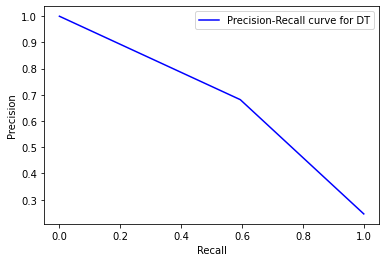

In [27]:
plt.plot(recall, precision, color='b', label='Precision-Recall curve for DT')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [28]:
# ROC curve for DT
fpr, tpr, thresholds = roc_curve(label_test, pred_tuned)
roc_auc = auc(fpr, tpr)
roc_auc

0.7519557179329167

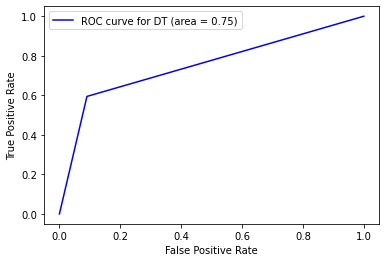

In [29]:
plt.plot(fpr, tpr, color='b', label='ROC curve for DT (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

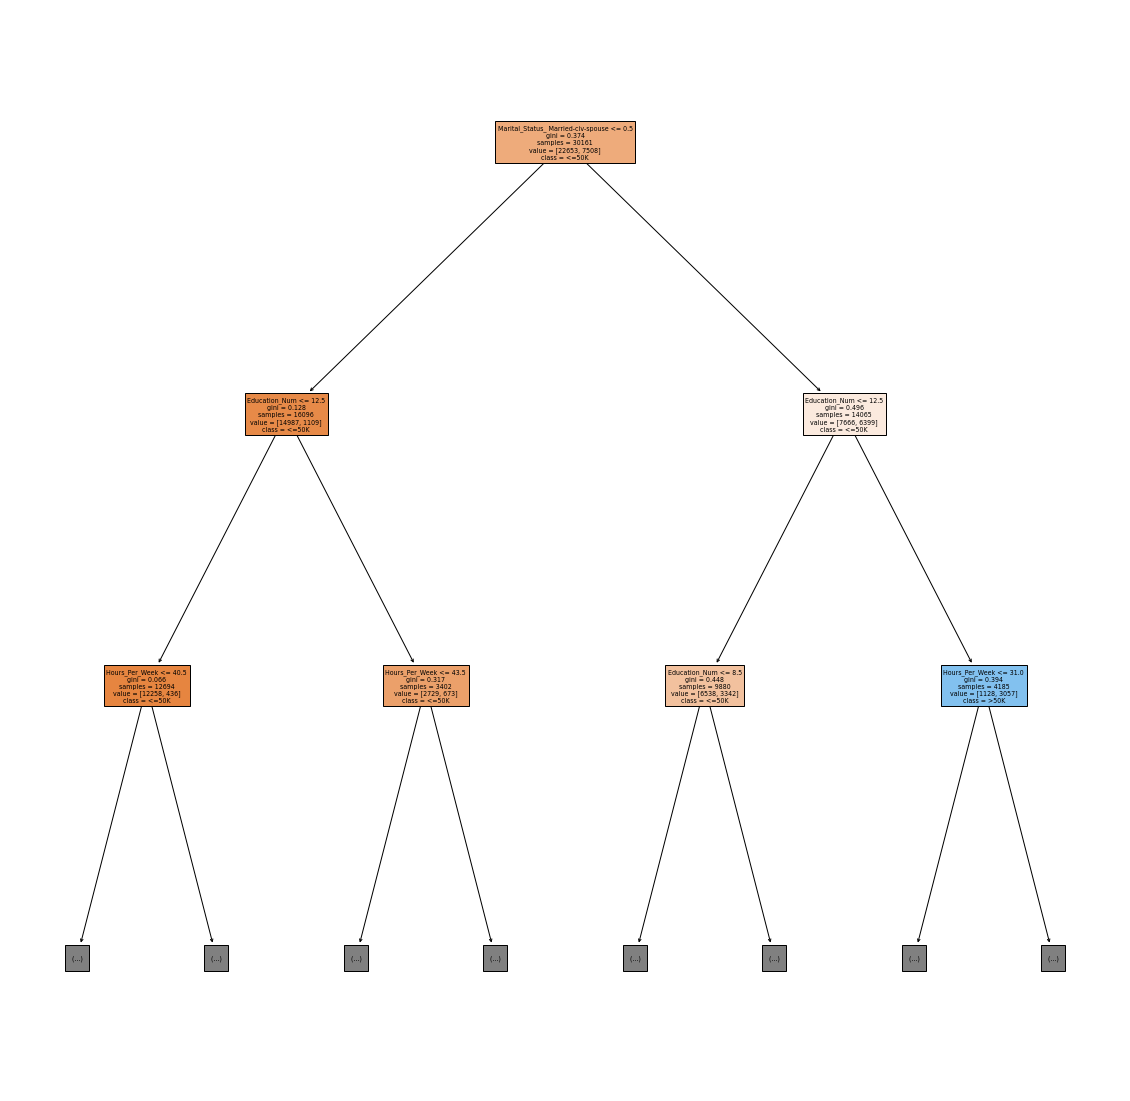

In [30]:
# visualize the tree (max_depth set to 2 to give a clear view of the tree structure)
fig = plt.figure(figsize=(20,20))
myTree = tree.plot_tree(dt_tuned,
                        feature_names=data_test.columns,
                        class_names=["<=50K",">50K"],
                        filled=True,
                        max_depth = 2) 

In [31]:
# Compare the accuracy of Knn and that of Decision Tree metrics
# import knn related packages
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# get an instance of knn classifier
knn_classifier = KNeighborsClassifier()

In [34]:
# visualize the hyperparameters for knn
knn_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [35]:
# choose 5 out of all to reduce time for fine tuning parameters
n_neighbors = list(np.arange(1, 30, step = 5))
weights = ["uniform", "distance", None]
p = [1, 2, 3]
algorithm = ["auto", "ball_tree", "kd_tree", "brute"]

In [36]:
# define the param_grid
param_grid = {
    "n_neighbors": n_neighbors,
    "weights": weights,
    "p": p,
    "algorithm": algorithm,
#     "leaf_size": leaf_size,
}

param_grid

{'n_neighbors': [1, 6, 11, 16, 21, 26],
 'weights': ['uniform', 'distance', None],
 'p': [1, 2, 3],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [37]:
# for the sake of hyperparameter tuning time, we select RandomizedSearchCV instead of the GridSearchCV
random_cv = RandomizedSearchCV(
    knn_classifier, param_grid, n_iter=200, cv=5, scoring="accuracy", n_jobs=-1
)

In [40]:
%%time
random_cv.fit(data, label)
print("The best parameter combination is:\n ")
print("\n".join("{}\t{}".format(k, v) for k, v in random_cv.best_params_.items()))

The best parameter combination is:
 
weights	uniform
p	1
n_neighbors	26
algorithm	ball_tree
Wall time: 32min 13s


In [41]:
# view the best score during the cross validation step
random_cv.best_score_

0.8249064220615088

In [42]:
# change the hyperparameters accordingly
knn_tuned = KNeighborsClassifier(n_neighbors = 26, weights = "uniform", p = 1, algorithm = "ball_tree")

In [43]:
%%time
# fit the training data into the decision knn model
knn_tuned = knn_tuned.fit(data, label)

Wall time: 307 ms


In [44]:
%%time
# predict the test data label
pred_tuned = knn_tuned.predict(data_test)

Wall time: 14.2 s


In [45]:
# check accuracy against the original y
print("Accuracy of KNN metric:",metrics.accuracy_score(label_test, pred_tuned))

Accuracy of KNN metric: 0.8200411713925227


In [46]:
# view the confusion matrix
print(confusion_matrix(label_test, pred_tuned))
print(classification_report(label_test, pred_tuned))

[[10307  1052]
 [ 1658  2042]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     11359
           1       0.66      0.55      0.60      3700

    accuracy                           0.82     15059
   macro avg       0.76      0.73      0.74     15059
weighted avg       0.81      0.82      0.81     15059



In [47]:
# PR curve for knn classifier
precision, recall, thresholds = precision_recall_curve(label_test, pred_tuned)
pr_auc = auc(recall, precision)
pr_auc

0.6609896179530519

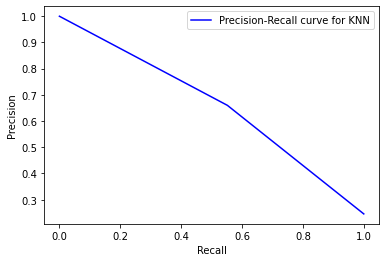

In [48]:
plt.plot(recall, precision, color='b', label='Precision-Recall curve for KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [49]:
# ROC curve for KNN
fpr, tpr, thresholds = roc_curve(label_test, pred_tuned)
roc_auc = auc(fpr, tpr)
roc_auc

0.7296390527335153

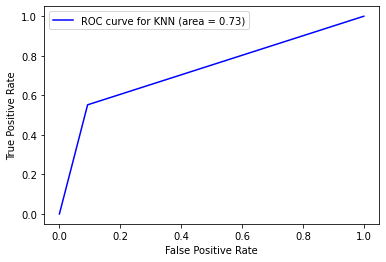

In [50]:
plt.plot(fpr, tpr, color='b', label='ROC curve for KNN (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [51]:
# Finally comparison using ensemble methods for model comparison
models = [('dt', dt_tuned), ('knn', knn_tuned)]
ensemble = VotingClassifier(estimators = models, voting = 'soft')

In [52]:
models = [dt_tuned, knn_tuned, ensemble]
names = ['Decision Tree', 'KNN', 'Ensemble']
res = []
for name, model in zip(names, models):
    scores = cross_val_score(model, data, label, cv=5, scoring='accuracy')
    res.append(scores)
    print('%s: %0.2f (+/- %0.2f)' % (name, scores.mean(), scores.std() * 2))

Decision Tree: 0.83 (+/- 0.01)
KNN: 0.82 (+/- 0.01)
Ensemble: 0.83 (+/- 0.01)
